**Machine Learning: Best-Selling Steam Games of All Time**

This dataset includes global sales data for best-selling video games, featuring attributes like game title, platform, genre, publisher, release year and sales by region.


**Approach**
Steps:
        •	Step 1: Data understanding , exploration and Importing Data
        
        •	Step 2: Data cleaning (handling nulls and outliers)
        
        •	Step 3: Pre-processing 
        
        •	Step 4: Data preprocessing (scaling, defining X&Y, Train_Test Split)
        
        •	Step 5: Model training (Classification)
        
        •	Step 6: Cross Validation
        
        •	Step 7: Final model selection and optimization

In [4]:
import numpy as ns
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv('C:/Users/ROHIT/Desktop/Desktop Items/cuvette/Final Project/Project 2/ML/bestSelling_games.csv', header=0)

In [8]:
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_name            2380 non-null   object 
 1   reviews_like_rate    2380 non-null   int64  
 2   all_reviews_number   2380 non-null   int64  
 3   release_date         2380 non-null   object 
 4   developer            2380 non-null   object 
 5   user_defined_tags    2380 non-null   object 
 6   supported_os         2380 non-null   object 
 7   supported_languages  2380 non-null   object 
 8   price                2380 non-null   float64
 9   other_features       2380 non-null   object 
 10  age_restriction      2380 non-null   int64  
 11  rating               2380 non-null   float64
 12  difficulty           2380 non-null   int64  
 13  length               2380 non-null   int64  
 14  estimated_downloads  2380 non-null   int64  
dtypes: float64(2), int64(6), object(7)
mem

In [13]:
df.describe()

,reviews_like_rate,all_reviews_number,price,age_restriction,rating,difficulty,length,estimated_downloads
count,2380.000000,2.380000e+03,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2.380000e+03
mean,82.413445,3.161508e+04,10.509130,10.605462,3.228017,2.864706,22.965126,2.523007e+06
std,12.643745,2.137197e+05,11.344576,6.395752,0.771203,0.975194,21.247556,1.118283e+07
min,20.000000,1.000000e+01,0.000000,0.000000,0.390000,1.000000,1.000000,9.000000e+01
25%,76.000000,3.420000e+02,2.990000,10.000000,2.750000,2.000000,6.000000,3.500000e+04
50%,85.000000,2.106500e+03,7.990000,13.000000,3.380000,3.000000,16.000000,2.171500e+05
75%,92.000000,1.303000e+04,12.490000,17.000000,3.810000,3.000000,34.000000,1.380000e+06
max,100.000000,8.803754e+06,79.990000,17.000000,4.830000,5.000000,80.000000,3.061700e+08


In [11]:
# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year and month into new columns
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

In [9]:
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads,release_year,release_month
0,Counter-Strike 2,86,8803754,2012-08-21,Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000,2012,8
1,PUBG: BATTLEGROUNDS,59,2554482,2017-12-21,PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000,2017,12
2,ELDEN RING NIGHTREIGN,77,53426,2025-05-30,"FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000,2025,5
3,The Last of Us™ Part I,79,45424,2023-03-28,Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000,2023,3
4,Red Dead Redemption 2,92,672140,2019-12-05,Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000,2019,12


In [13]:
# Check for missing values in specified columns
missing_values = df[['price', 'difficulty', 'rating']].isnull().sum()

# Show missing value count
missing_values

price         0
difficulty    0
rating        0
dtype: int64

In [15]:
# Ensure 'price' is float (if needed)
df['price'] = df['price'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   game_name            2380 non-null   object        
 1   reviews_like_rate    2380 non-null   int64         
 2   all_reviews_number   2380 non-null   int64         
 3   release_date         2380 non-null   datetime64[ns]
 4   developer            2380 non-null   object        
 5   user_defined_tags    2380 non-null   object        
 6   supported_os         2380 non-null   object        
 7   supported_languages  2380 non-null   object        
 8   price                2380 non-null   float64       
 9   other_features       2380 non-null   object        
 10  age_restriction      2380 non-null   int64         
 11  rating               2380 non-null   float64       
 12  difficulty           2380 non-null   int64         
 13  length               2380 non-nul

In [17]:
# Define bins and labels
bins = [-0.01, 0.01, 10, 30, float('inf')]
labels = ['Free', '<$10', '$10–30', '>$30']

In [19]:
# Bin the price column
df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels)

In [21]:
print(df['price_bin'].value_counts())

price_bin
<$10      1321
$10–30     766
Free       169
>$30       124
Name: count, dtype: int64


In [23]:
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads,release_year,release_month,price_bin
0,Counter-Strike 2,86,8803754,2012-08-21,Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000,2012,8,Free
1,PUBG: BATTLEGROUNDS,59,2554482,2017-12-21,PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000,2017,12,Free
2,ELDEN RING NIGHTREIGN,77,53426,2025-05-30,"FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000,2025,5,$10–30
3,The Last of Us™ Part I,79,45424,2023-03-28,Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000,2023,3,>$30
4,Red Dead Redemption 2,92,672140,2019-12-05,Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000,2019,12,>$30


In [25]:
#multi-label binarization
from sklearn.preprocessing import MultiLabelBinarizer

In [27]:
# Convert string of tags into list
df['user_defined_tags'] = df['user_defined_tags'].fillna('').apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])
df['supported_os'] = df['supported_os'].fillna('').apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])
df['other_features'] = df['other_features'].fillna('').apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])

In [29]:
mlb = MultiLabelBinarizer()

# Binarize user_defined_tags(converts to binary matrix)
tags_encoded = pd.DataFrame(mlb.fit_transform(df['user_defined_tags']), columns=mlb.classes_, index=df.index)

# Binarize supported_os
os_encoded = pd.DataFrame(mlb.fit_transform(df['supported_os']), columns=mlb.classes_, index=df.index)

# Binarize other_features
features_encoded = pd.DataFrame(mlb.fit_transform(df['other_features']), columns=mlb.classes_, index=df.index)


In [31]:
df = pd.concat([df, tags_encoded.add_prefix('tag_'), os_encoded.add_prefix('os_'), features_encoded.add_prefix('feat_')], axis=1)


In [35]:
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,...,feat_Steam Cloud,feat_Steam Leaderboards,feat_Steam Timeline,feat_Steam Trading Cards,feat_Steam Turn Notifications,feat_Steam Workshop,feat_SteamVR Collectibles,feat_Tracked Controller Support,feat_VR Only,feat_VR Supported
0,Counter-Strike 2,86,8803754,2012-08-21,Valve,"[FPS, Action, Tactical]","[win, linux]","English, Czech, Danish, Dutch, Finnish, French...",0.00,"[Cross-Platform Multiplayer, Steam Trading Car...",...,0,0,1,1,0,1,0,0,0,0
1,PUBG: BATTLEGROUNDS,59,2554482,2017-12-21,PUBG Corporation,"[Survival, Shooter, Action, Tactical]",[win],"English, Korean, Simplified Chinese, French, G...",0.00,"[Online PvP, Stats, Remote Play on Phone, Remo...",...,0,0,0,0,0,0,0,0,0,0
2,ELDEN RING NIGHTREIGN,77,53426,2025-05-30,"FromSoftware, Inc.","[Souls-like, Open World, Fantasy, RPG]",[win],"English, Japanese, French, Italian, German, Sp...",25.99,"[Single-player, Online Co-op, Steam Achievemen...",...,1,0,0,0,0,0,0,0,0,0
3,The Last of Us™ Part I,79,45424,2023-03-28,Naughty Dog LLC,"[Story Rich, Shooter, Survival, Horror]",[win],"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"[Single-player, Steam Achievements, Steam Trad...",...,1,0,0,1,0,0,0,0,0,0
4,Red Dead Redemption 2,92,672140,2019-12-05,Rockstar Games,"[Open World, Story Rich, Adventure, Realistic,...",[win],"English, French, Italian, German, Spanish - Sp...",59.99,"[Single-player, Online PvP, Online Co-op, Stea...",...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Relationship between reviews, ratings, and downloads.
import matplotlib.pyplot as plt

<Axes: xlabel='all_reviews_number', ylabel='estimated_downloads'>

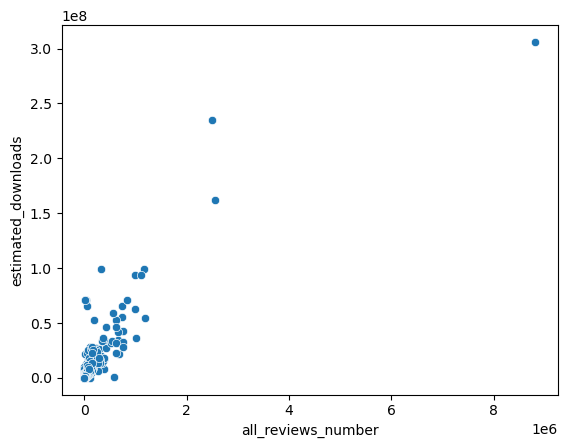

In [35]:
sns.scatterplot(x='all_reviews_number', y='estimated_downloads', data=df)

<Axes: xlabel='rating', ylabel='estimated_downloads'>

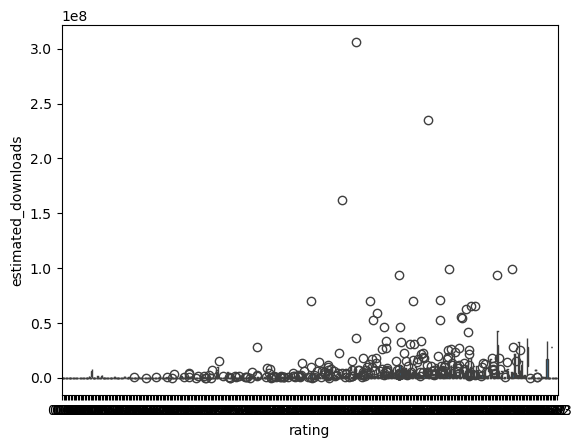

In [37]:
sns.boxplot(x='rating', y='estimated_downloads', data=df)

<Axes: >

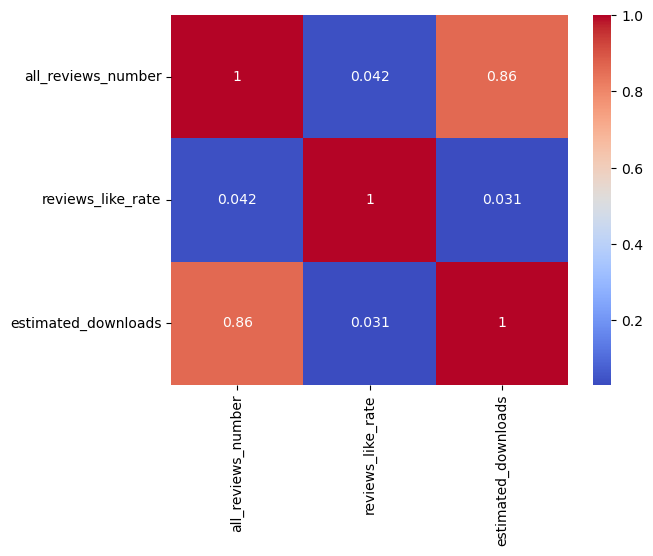

In [39]:
num_cols = ['all_reviews_number', 'reviews_like_rate', 'estimated_downloads']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')

In [41]:
#Top genres/tags associated with high downloads.
# Filter all columns that came from binarization
tag_cols = [col for col in df.columns if col.startswith('tag_')]

In [43]:
tag_downloads = pd.DataFrame(columns=['Tag', 'Average Downloads'])

for tag in tag_cols:
    avg = df[df[tag] == 1]['estimated_downloads'].mean()
    tag_downloads = pd.concat([tag_downloads, pd.DataFrame({'Tag': [tag], 'Average Downloads': [avg]})])

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_17956\2229291187.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tag_downloads = pd.concat([tag_downloads, pd.DataFrame({'Tag': [tag], 'Average Downloads': [avg]})])


In [45]:
tag_downloads = tag_downloads.sort_values(by='Average Downloads', ascending=False).reset_index(drop=True)
print(tag_downloads.head(10))

              Tag  Average Downloads
0    tag_Tactical       9.160259e+06
1    tag_Crafting       7.543168e+06
2         tag_FPS       7.348330e+06
3    tag_Survival       6.069974e+06
4  tag_Open World       5.962761e+06
5      tag_MMORPG       5.873232e+06
6  tag_Souls-like       5.057189e+06
7     tag_Shooter       4.165831e+06
8      tag_Action       4.106922e+06
9     tag_Sandbox       4.098943e+06


<Axes: xlabel='Average Downloads', ylabel='Tag'>

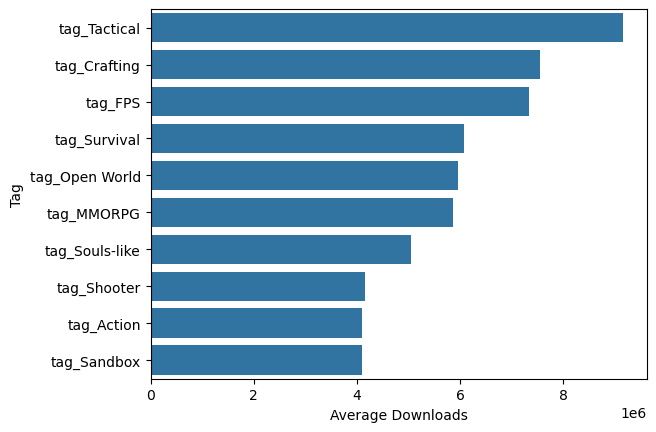

In [47]:
sns.barplot(x='Average Downloads', y='Tag', data=tag_downloads.head(10))

<Axes: xlabel='price_bin', ylabel='estimated_downloads'>

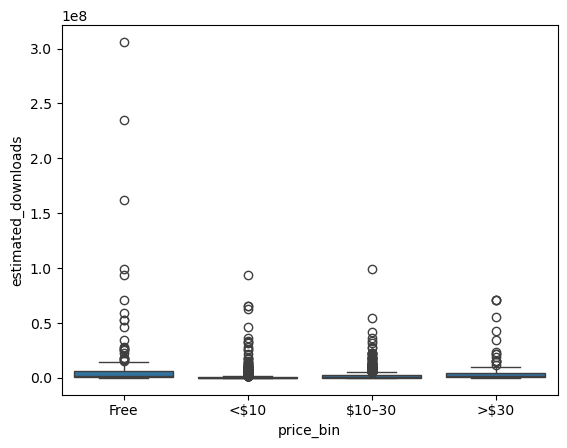

In [51]:
#Price distribution vs. download volume.
sns.boxplot(x='price_bin', y='estimated_downloads', data=df, order=['Free', '<$10', '$10–30', '>$30'])


In [53]:
price_downloads = df.groupby('price_bin')['estimated_downloads'].mean().reset_index()

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_17956\1159709612.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_downloads = df.groupby('price_bin')['estimated_downloads'].mean().reset_index()


C:\Users\ROHIT\AppData\Local\Temp\ipykernel_17956\2710956785.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_downloads, x='price_bin', y='estimated_downloads', palette='coolwarm')


<Axes: xlabel='price_bin', ylabel='estimated_downloads'>

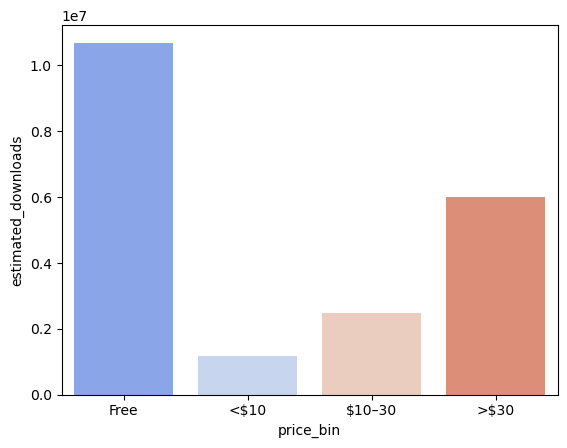

In [55]:
sns.barplot(data=price_downloads, x='price_bin', y='estimated_downloads', palette='coolwarm')

In [57]:
#Correlation matrix of numerical features.
num_df = df.select_dtypes(include='number')

In [59]:
correlation_matrix = num_df.corr()

In [61]:
correlation_matrix

,reviews_like_rate,all_reviews_number,price,age_restriction,rating,difficulty,length,estimated_downloads,release_year,release_month,...,feat_Steam Cloud,feat_Steam Leaderboards,feat_Steam Timeline,feat_Steam Trading Cards,feat_Steam Turn Notifications,feat_Steam Workshop,feat_SteamVR Collectibles,feat_Tracked Controller Support,feat_VR Only,feat_VR Supported
reviews_like_rate,1.000000,0.041926,-0.047984,-0.074772,0.534457,-0.022052,0.022845,0.031049,-0.061237,0.006762,...,0.210908,0.068274,0.029221,0.085791,0.008395,0.130821,0.010830,-0.014906,-0.055676,0.046536
all_reviews_number,0.041926,1.000000,0.038044,0.057722,0.079721,0.074615,0.221055,0.863408,-0.106498,0.033432,...,-0.027890,-0.024514,0.362220,0.096839,0.006451,0.130469,0.117765,0.013142,-0.015109,0.029779
price,-0.047984,0.038044,1.000000,0.126237,0.222551,0.170226,0.342366,0.061999,0.042743,0.041297,...,0.120964,-0.049917,-0.013488,0.130644,0.035925,0.078753,-0.019495,0.032409,0.037304,0.076408
age_restriction,-0.074772,0.057722,0.126237,1.000000,0.030361,0.021226,0.044193,0.085718,-0.141484,-0.001894,...,-0.014317,-0.056099,0.020261,0.042535,-0.031156,-0.061882,0.005740,0.045336,0.032914,-0.044866
rating,0.534457,0.079721,0.222551,0.030361,1.000000,0.194386,0.336254,0.119670,-0.186430,0.015004,...,0.138894,0.046488,0.029737,0.119478,0.006491,0.092892,0.018864,0.019935,-0.010046,0.051425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feat_Steam Workshop,0.130821,0.130469,0.078753,-0.061882,0.092892,0.097894,0.174252,0.151029,-0.079236,0.002632,...,0.088608,0.099980,0.110662,0.153226,0.021297,1.000000,0.021297,0.013873,-0.010516,0.054552
feat_SteamVR Collectibles,0.010830,0.117765,-0.019495,0.005740,0.018864,-0.004827,0.011656,0.213989,-0.041699,-0.013434,...,-0.045982,0.021297,0.155915,0.012508,-0.001684,0.021297,1.000000,0.194845,0.073402,0.165418
feat_Tracked Controller Support,-0.014906,0.013142,0.032409,0.045336,0.019935,0.075291,-0.023029,0.017167,-0.010307,-0.002138,...,-0.081504,0.013873,-0.010175,-0.058549,-0.006427,0.013873,0.194845,1.000000,0.760726,0.391806
feat_VR Only,-0.055676,-0.015109,0.037304,0.032914,-0.010046,0.064740,-0.071988,-0.023948,0.012862,0.008677,...,-0.096372,0.000413,-0.008600,-0.071044,-0.005432,-0.010516,0.073402,0.760726,1.000000,-0.016175


**Feature Engineering**

In [63]:
#Create a binary flag for is_free from price == 0
df['is_free'] = (df['price'] == 0).astype(int)

In [71]:
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,...,feat_Steam Leaderboards,feat_Steam Timeline,feat_Steam Trading Cards,feat_Steam Turn Notifications,feat_Steam Workshop,feat_SteamVR Collectibles,feat_Tracked Controller Support,feat_VR Only,feat_VR Supported,is_free
0,Counter-Strike 2,86,8803754,2012-08-21,Valve,"[FPS, Action, Tactical]","[win, linux]","English, Czech, Danish, Dutch, Finnish, French...",0.00,"[Cross-Platform Multiplayer, Steam Trading Car...",...,0,1,1,0,1,0,0,0,0,1
1,PUBG: BATTLEGROUNDS,59,2554482,2017-12-21,PUBG Corporation,"[Survival, Shooter, Action, Tactical]",[win],"English, Korean, Simplified Chinese, French, G...",0.00,"[Online PvP, Stats, Remote Play on Phone, Remo...",...,0,0,0,0,0,0,0,0,0,1
2,ELDEN RING NIGHTREIGN,77,53426,2025-05-30,"FromSoftware, Inc.","[Souls-like, Open World, Fantasy, RPG]",[win],"English, Japanese, French, Italian, German, Sp...",25.99,"[Single-player, Online Co-op, Steam Achievemen...",...,0,0,0,0,0,0,0,0,0,0
3,The Last of Us™ Part I,79,45424,2023-03-28,Naughty Dog LLC,"[Story Rich, Shooter, Survival, Horror]",[win],"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"[Single-player, Steam Achievements, Steam Trad...",...,0,0,1,0,0,0,0,0,0,0
4,Red Dead Redemption 2,92,672140,2019-12-05,Rockstar Games,"[Open World, Story Rich, Adventure, Realistic,...",[win],"English, French, Italian, German, Spanish - Sp...",59.99,"[Single-player, Online PvP, Online Co-op, Stea...",...,0,0,0,0,0,0,0,0,0,0


In [65]:
#Create review_volume_bucket for low, medium and high based on review count.
bins = [0, 100000, 2000000, df['all_reviews_number'].max()]
labels = ['Low', 'Medium', 'High']

df['review_volume_bucket'] = pd.cut(df['all_reviews_number'], bins=bins, labels=labels)

In [77]:
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,...,feat_Steam Timeline,feat_Steam Trading Cards,feat_Steam Turn Notifications,feat_Steam Workshop,feat_SteamVR Collectibles,feat_Tracked Controller Support,feat_VR Only,feat_VR Supported,is_free,review_volume_bucket
0,Counter-Strike 2,86,8803754,2012-08-21,Valve,"[FPS, Action, Tactical]","[win, linux]","English, Czech, Danish, Dutch, Finnish, French...",0.00,"[Cross-Platform Multiplayer, Steam Trading Car...",...,1,1,0,1,0,0,0,0,1,High
1,PUBG: BATTLEGROUNDS,59,2554482,2017-12-21,PUBG Corporation,"[Survival, Shooter, Action, Tactical]",[win],"English, Korean, Simplified Chinese, French, G...",0.00,"[Online PvP, Stats, Remote Play on Phone, Remo...",...,0,0,0,0,0,0,0,0,1,High
2,ELDEN RING NIGHTREIGN,77,53426,2025-05-30,"FromSoftware, Inc.","[Souls-like, Open World, Fantasy, RPG]",[win],"English, Japanese, French, Italian, German, Sp...",25.99,"[Single-player, Online Co-op, Steam Achievemen...",...,0,0,0,0,0,0,0,0,0,Low
3,The Last of Us™ Part I,79,45424,2023-03-28,Naughty Dog LLC,"[Story Rich, Shooter, Survival, Horror]",[win],"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"[Single-player, Steam Achievements, Steam Trad...",...,0,1,0,0,0,0,0,0,0,Low
4,Red Dead Redemption 2,92,672140,2019-12-05,Rockstar Games,"[Open World, Story Rich, Adventure, Realistic,...",[win],"English, French, Italian, German, Spanish - Sp...",59.99,"[Single-player, Online PvP, Online Co-op, Stea...",...,0,0,0,0,0,0,0,0,0,Medium


In [67]:
#Count of tags, languages and platforms supported.
# 1.Count tags
tag_cols = [col for col in df.columns if col.startswith('tag_')]

tag_counts = df[tag_cols].sum().sort_values(ascending=False)

print("Top Tags by Count:\n", tag_counts.head(10))

Top Tags by Count:
 tag_Simulation    737
tag_Action        730
tag_Adventure     520
tag_RPG           440
tag_Strategy      352
tag_2D            308
tag_Horror        299
tag_FPS           247
tag_Survival      236
tag_Open World    236
dtype: int64


In [69]:
#2. Count Platforms
os_cols = [col for col in df.columns if col.startswith('os_')]

platform_counts = df[os_cols].sum().sort_values(ascending=False)

print("Platforms by Count:\n", platform_counts)


Platforms by Count:
 os_win      2380
os_mac       596
os_linux     368
os_music       1
dtype: int64


In [71]:
# Convert string of tags into list
df['supported_languages'] = df['supported_languages'].fillna('').apply(lambda x: [i.strip() for i in x.split(',') if i.strip()])


In [73]:
#Parse languages_supported into binary columns using multi-label binarization
lang_df= pd.DataFrame(mlb.fit_transform(df['supported_languages']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, lang_df.add_prefix('lang_')], axis=1)

In [75]:
#Language_count
lang_cols = [col for col in df.columns if col.startswith('lang_')]
language_counts = df[lang_cols].sum().sort_values(ascending=False)
print("Top Languages by Count:\n", language_counts.head(10))

Top Languages by Count:
 lang_English                2380
lang_German                 1717
lang_French                 1684
lang_Simplified Chinese     1595
lang_Spanish - Spain        1582
lang_Japanese               1506
lang_Russian                1501
lang_Italian                1314
lang_Portuguese - Brazil    1233
lang_Korean                 1217
dtype: int64


In [77]:
# Calculate review_score = reviews_like_rate * all_reviews_number.
df['review_score'] = df['reviews_like_rate'] * df['all_reviews_number']


In [79]:
df['review_score'].head()

0    757122844
1    150714438
2      4113802
3      3588496
4     61836880
Name: review_score, dtype: int64

In [81]:
#converting 80-->0.80
df['review_score'] = (df['reviews_like_rate'].astype(float) / 100) * df['all_reviews_number']

In [83]:
df['review_score'].head()

0    7571228.44
1    1507144.38
2      41138.02
3      35884.96
4     618368.80
Name: review_score, dtype: float64

**Modeling (Classification)**

We’ll classify games as:

1 (High Downloads): top 25%

0 (Low Downloads): bottom 75%

**So we will be predicting if the game will get High Downloads or Low Downloads**

In [85]:
# Create binary target variable based on download quantile
threshold = df['estimated_downloads'].quantile(0.75)
df['high_download'] = (df['estimated_downloads'] >= threshold).astype(int)

In [93]:
df['high_download']

0       1
1       1
2       0
3       1
4       1
       ..
2375    0
2376    0
2377    0
2378    0
2379    0
Name: high_download, Length: 2380, dtype: int32

In [87]:
from sklearn.model_selection import train_test_split

In [97]:
# Numeric and engineered features
numeric_features = ['price', 'rating', 'difficulty', 'length', 'is_free', 'review_score']

# Grab column names for binary features
tag_features = [col for col in df.columns if col.startswith('tag_')]
os_features = [col for col in df.columns if col.startswith('os_')]
feature_features = [col for col in df.columns if col.startswith('feature_')]

In [99]:
# Combine all into final X
X = df[numeric_features + tag_features + os_features + feature_features]
y = df['high_download']

In [101]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [104]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1904, 52) (476, 52) (1904,) (476,)


**Logestic Regression**

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [111]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

C:\Users\ROHIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [113]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # probability for class 1

In [115]:
log_reg.coef_

array([[ 1.23702629e-02,  3.15086569e-01, -1.19906811e-01,
         8.50818430e-03,  8.58243132e-01,  1.59538058e-04,
        -2.28534956e-01, -6.52337257e-01,  3.24632675e-01,
        -5.32621094e-02, -8.74905027e-01, -5.07979568e-01,
         2.20077966e-01, -2.65454171e-02,  3.92335058e-01,
         3.52015152e-01,  8.34587775e-02, -2.90162140e-01,
         9.05739246e-02, -1.30235739e+00,  5.84479707e-01,
         3.08597839e-01,  3.57008095e-01,  1.50738904e-01,
        -6.15170017e-01,  6.50025149e-01,  9.13287637e-01,
         5.78638765e-01,  7.72361315e-02, -5.89228817e-01,
         2.62431200e-01, -2.68865675e-01,  1.66165750e-02,
        -6.92070821e-01, -3.21730270e-03, -4.44386901e-01,
        -1.13850905e-01, -9.86223273e-01, -5.08409690e-01,
         1.72488736e-01,  8.60274834e-01,  9.32197248e-02,
        -8.87610264e-02,  7.92208136e-01, -1.21425559e-01,
        -3.28270447e-01, -5.05018951e-01,  3.09664799e-01,
         1.74092576e-01,  3.91908627e-01, -1.12433444e-0

In [119]:
log_reg.intercept_

array([-2.1781733])

In [125]:
from sklearn.metrics import classification_report, accuracy_score, precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, roc_curve

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       357
           1       0.88      0.70      0.78       119

    accuracy                           0.90       476
   macro avg       0.89      0.83      0.86       476
weighted avg       0.90      0.90      0.90       476



In [131]:
accuracy_score(y_test, y_pred)

0.9012605042016807

In [129]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred))
print("✅ Recall:", recall_score(y_test, y_pred))
print("✅ F1 Score:", f1_score(y_test, y_pred))
print("✅ AUC-ROC:", roc_auc_score(y_test, y_proba))

✅ Accuracy: 0.9012605042016807
✅ Precision: 0.8829787234042553
✅ Recall: 0.6974789915966386
✅ F1 Score: 0.7793427230046949
✅ AUC-ROC: 0.9547112962832192


Optimizing Logestic regression

In [168]:
from sklearn.model_selection import GridSearchCV

In [172]:
param_grid= {
    'C': [0.001, 0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],                
    'solver': ['liblinear'],                
    'class_weight': [None, 'balanced']      
}

In [174]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',    
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [176]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [178]:
best_lr = grid_search.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
grid_search.best_params_

{'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

In [180]:
accuracy_score(y_test, y_pred_best_lr)

0.9033613445378151

In [182]:
#Probablity
y_proba1 = best_lr.predict_proba(X_test)[:, 1] 

**Random Forest Classifier**

In [134]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [136]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [138]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [140]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       357
           1       0.87      0.82      0.84       119

    accuracy                           0.92       476
   macro avg       0.91      0.89      0.90       476
weighted avg       0.92      0.92      0.92       476



In [144]:
accuracy_score(y_test, y_pred_rf)

0.9243697478991597

In [142]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred_rf))
print("✅ Precision:", precision_score(y_test, y_pred_rf))
print("✅ Recall:", recall_score(y_test, y_pred_rf))
print("✅ F1 Score:", f1_score(y_test, y_pred_rf))
print("✅ AUC-ROC:", roc_auc_score(y_test, y_proba_rf))

✅ Accuracy: 0.9243697478991597
✅ Precision: 0.8738738738738738
✅ Recall: 0.8151260504201681
✅ F1 Score: 0.8434782608695652
✅ AUC-ROC: 0.9573476449403291


Optimizing Random Forest

In [192]:
rf_param = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [198]:
grid_search1 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=rf_param,
    scoring='accuracy', cv=3,n_jobs=-1,  verbose=1 )

In [200]:
grid_search1.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [208]:
best_rf = grid_search1.best_estimator_

In [210]:
y_pred_best_rf = best_rf.predict(X_test)

In [212]:
accuracy_score(y_test, y_pred_best_rf)

0.9201680672268907

In [214]:
#Probablity
y_proba2 = best_rf.predict_proba(X_test)[:, 1]

**Gradient Boosting**

In [151]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

In [153]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [155]:
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

In [157]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       357
           1       0.85      0.79      0.82       119

    accuracy                           0.91       476
   macro avg       0.89      0.87      0.88       476
weighted avg       0.91      0.91      0.91       476



In [161]:
accuracy_score(y_test, y_pred_gb)

0.9138655462184874

In [159]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred_gb))
print("✅ Precision:", precision_score(y_test, y_pred_gb))
print("✅ Recall:", recall_score(y_test, y_pred_gb))
print("✅ F1 Score:", f1_score(y_test, y_pred_gb))
print("✅ AUC-ROC:", roc_auc_score(y_test, y_proba_gb))

✅ Accuracy: 0.9138655462184874
✅ Precision: 0.8545454545454545
✅ Recall: 0.7899159663865546
✅ F1 Score: 0.8209606986899564
✅ AUC-ROC: 0.9703881552621048


In [165]:
model_scores = {
    'Logistic Regression': [accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_proba)],
    'Random Forest': [accuracy_score(y_test, y_pred_rf), roc_auc_score(y_test, y_proba_rf)],
    'Gradient Boosting': [accuracy_score(y_test, y_pred_gb), roc_auc_score(y_test, y_proba_gb)]
}

import pandas as pd
summary_df = pd.DataFrame(model_scores, index=['Accuracy', 'AUC-ROC']).T
print(summary_df)

                     Accuracy   AUC-ROC
Logistic Regression  0.901261  0.954711
Random Forest        0.924370  0.957348
Gradient Boosting    0.913866  0.970388


Optimizing Gradient boosting

In [219]:
param_grid1 = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
}

In [221]:
grid_search2 = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=0),
    param_grid=param_grid1,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [223]:
grid_search2.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [227]:
best_gb = grid_search2.best_estimator_

In [229]:
y_pred_best_gb = best_gb.predict(X_test)

In [231]:
grid_search2.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [233]:
accuracy_score(y_test, y_pred_best_gb)

0.9138655462184874

**Cross Validation**

In [236]:
from sklearn.model_selection import cross_val_score

In [238]:
#Logestic Regression
cv_scores1=cross_val_score(best_lr, X_train, y_train, cv=5)

In [240]:
cv_scores1

array([0.91076115, 0.89238845, 0.91863517, 0.9160105 , 0.92894737])

In [242]:
cv_scores1.mean()

0.9133485288023208

In [246]:
cv_scores1.std()

0.012036426458729304

In [248]:
#Random Forest
cv_scores2=cross_val_score(rf, X_train, y_train, cv=5)

In [250]:
cv_scores2

array([0.91863517, 0.91863517, 0.93700787, 0.92125984, 0.92894737])

In [252]:
cv_scores2.mean()

0.9248970852327669

In [254]:
cv_scores2.std()

0.0071376282202037025

In [256]:
#Gradient Boosting
cv_scores3 = cross_val_score(best_gb, X_train, y_train, cv=5, scoring='accuracy')

In [260]:
#cv_Score
cv_scores3

array([0.91863517, 0.92388451, 0.9343832 , 0.9160105 , 0.93157895])

In [262]:
#Mean Accuracy
cv_scores3.mean()

0.9248984666390385

In [264]:
#Standard Deviation (Low means model is stable and consistent)
cv_scores3.std()

0.007125194455409959

**Evaluation**

In [269]:
#Logistic Reasoning
print("✅ Accuracy:", accuracy_score(y_test, y_pred_best_lr))
print("✅ Precision:", precision_score(y_test, y_pred_best_lr))
print("✅ Recall:", recall_score(y_test, y_pred_best_lr))
print("✅ F1 Score:", f1_score(y_test, y_pred_best_lr))
print("✅ AUC-ROC:", roc_auc_score(y_test, y_proba))

✅ Accuracy: 0.9033613445378151
✅ Precision: 0.8924731182795699
✅ Recall: 0.6974789915966386
✅ F1 Score: 0.7830188679245284
✅ AUC-ROC: 0.9547112962832192


In [271]:
#Random Forest
print("✅ Accuracy:", accuracy_score(y_test, y_pred_rf))
print("✅ Precision:", precision_score(y_test, y_pred_rf))
print("✅ Recall:", recall_score(y_test, y_pred_rf))
print("✅ F1 Score:", f1_score(y_test, y_pred_rf))
print("✅ AUC-ROC:", roc_auc_score(y_test, y_proba_rf))

✅ Accuracy: 0.9243697478991597
✅ Precision: 0.8738738738738738
✅ Recall: 0.8151260504201681
✅ F1 Score: 0.8434782608695652
✅ AUC-ROC: 0.9573476449403291


In [273]:
#Gradient Boosting
print("✅ Accuracy:", accuracy_score(y_test, y_pred_gb))
print("✅ Precision:", precision_score(y_test, y_pred_gb))
print("✅ Recall:", recall_score(y_test, y_pred_gb))
print("✅ F1 Score:", f1_score(y_test, y_pred_gb))
print("✅ AUC-ROC:", roc_auc_score(y_test, y_proba_gb))

✅ Accuracy: 0.9138655462184874
✅ Precision: 0.8545454545454545
✅ Recall: 0.7899159663865546
✅ F1 Score: 0.8209606986899564
✅ AUC-ROC: 0.9703881552621048


**Gradient Boosting has the highest AUC-ROC (0.97) and strong F1-score.---> balanced performance.**
                                                                                                                
**Random Forest has the highest accuracy and F1.---> offering great stability.**
                                                                
**Logistic Regression gives the best precision .---> useful for interpretation.**
                                                                